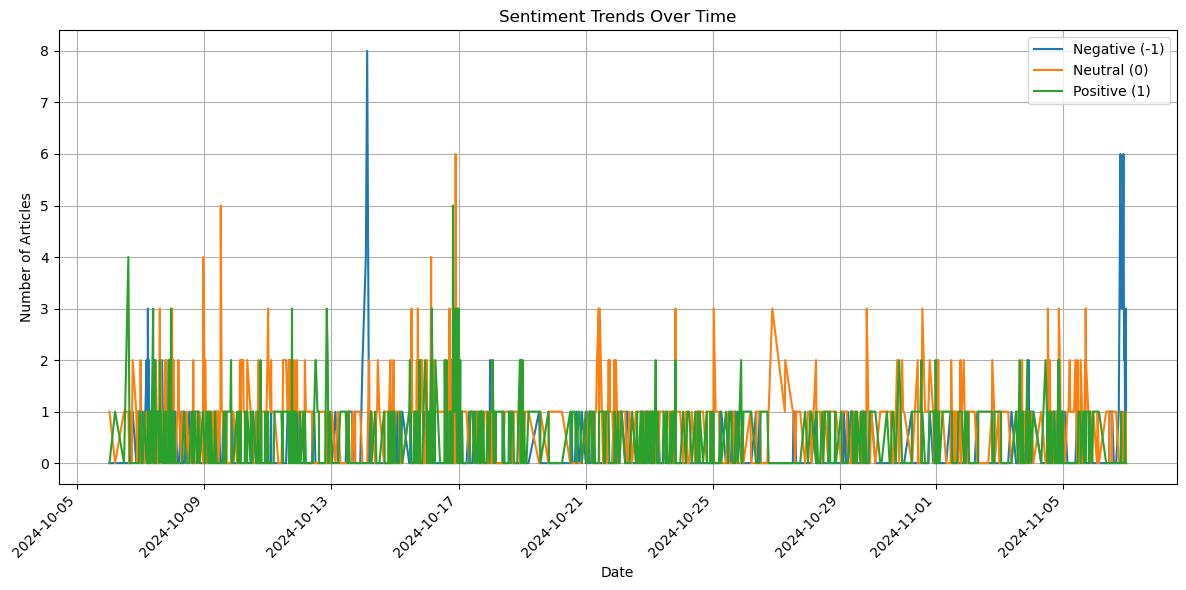

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the updated dataset with sentiment scores
file_path = r'D:\Projects\Project Seminar\dataCollection\data\News_Articles_with_sentiment.csv'
data = pd.read_csv(file_path)

# Convert `seendate` to datetime format, handling ISO 8601 and mixed formats
data['seendate'] = pd.to_datetime(data['seendate'], format='mixed', errors='coerce')

# Drop rows where `seendate` could not be parsed
data = data.dropna(subset=['seendate'])

# Group data by date and sentiment, then calculate the count of each sentiment per day
sentiment_trends = data.groupby(['seendate', 'sentiment']).size().unstack(fill_value=0)

# Plot the sentiment trends
plt.figure(figsize=(12, 6))
sentiment_trends.plot(kind='line', ax=plt.gca())
plt.title("Sentiment Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.legend(['Negative (-1)', 'Neutral (0)', 'Positive (1)'])
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


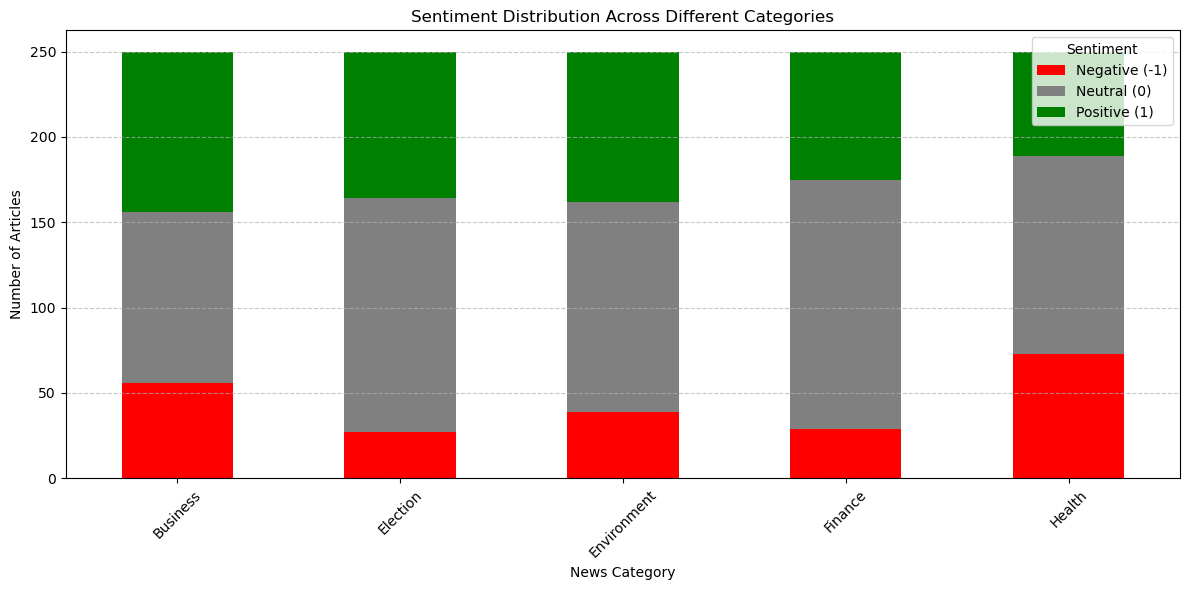

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the updated dataset with sentiment scores
file_path = r'D:\Projects\Project Seminar\dataCollection\data\News_Articles_with_sentiment.csv'
data = pd.read_csv(file_path)

# Group by category and sentiment, then count occurrences
category_sentiment = data.groupby(['category', 'sentiment']).size().unstack(fill_value=0)

# Plotting the bar graph
category_sentiment.plot(kind='bar', stacked=True, figsize=(12, 6), color=['red', 'gray', 'green'])
plt.title("Sentiment Distribution Across Different Categories")
plt.xlabel("News Category")
plt.ylabel("Number of Articles")
plt.legend(['Negative (-1)', 'Neutral (0)', 'Positive (1)'], title="Sentiment")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


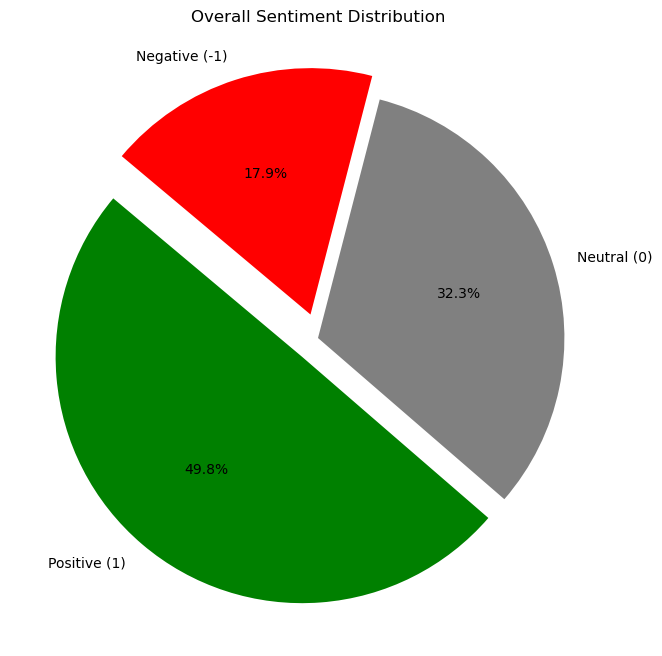

In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the updated dataset with sentiment scores
file_path = r'D:\Projects\Project Seminar\dataCollection\data\News_Articles_with_sentiment.csv'
data = pd.read_csv(file_path)

# Count occurrences of each sentiment
sentiment_counts = data['sentiment'].value_counts()

# Define labels and colors for the pie chart
labels = ['Positive (1)', 'Neutral (0)', 'Negative (-1)']
colors = ['green', 'gray', 'red']

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=(0.1, 0, 0.1))
plt.title("Overall Sentiment Distribution")
plt.show()


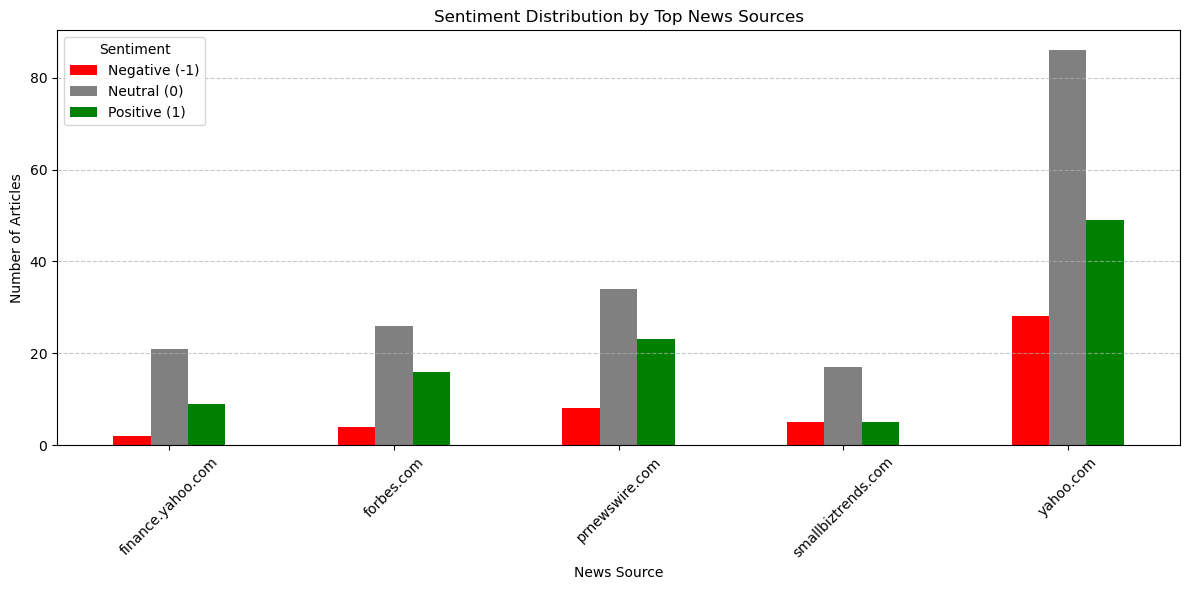

In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the updated dataset with sentiment scores
file_path = r'D:\Projects\Project Seminar\dataCollection\data\News_Articles_with_sentiment.csv'
data = pd.read_csv(file_path)

# Identify the top sources by article count (e.g., top 5)
top_sources = data['sourcename'].value_counts().nlargest(5).index
top_sources_data = data[data['sourcename'].isin(top_sources)]

# Group by source and sentiment, then count occurrences
source_sentiment = top_sources_data.groupby(['sourcename', 'sentiment']).size().unstack(fill_value=0)

# Plotting the grouped bar chart
source_sentiment.plot(kind='bar', figsize=(12, 6), color=['red', 'gray', 'green'])
plt.title("Sentiment Distribution by Top News Sources")
plt.xlabel("News Source")
plt.ylabel("Number of Articles")
plt.legend(['Negative (-1)', 'Neutral (0)', 'Positive (1)'], title="Sentiment")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


Sentiment counts for Business category:
sentiment_score
Neutral     100
Positive     94
Negative     56
Name: count, dtype: int64




<Figure size 1200x600 with 0 Axes>

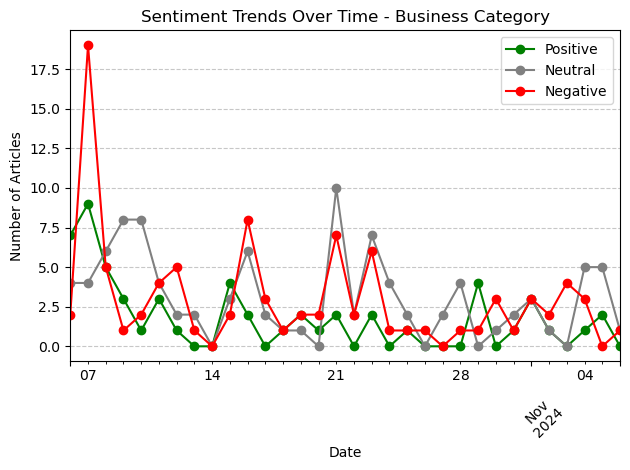

Sentiment counts for Election category:
sentiment_score
Neutral     137
Positive     86
Negative     27
Name: count, dtype: int64




<Figure size 1200x600 with 0 Axes>

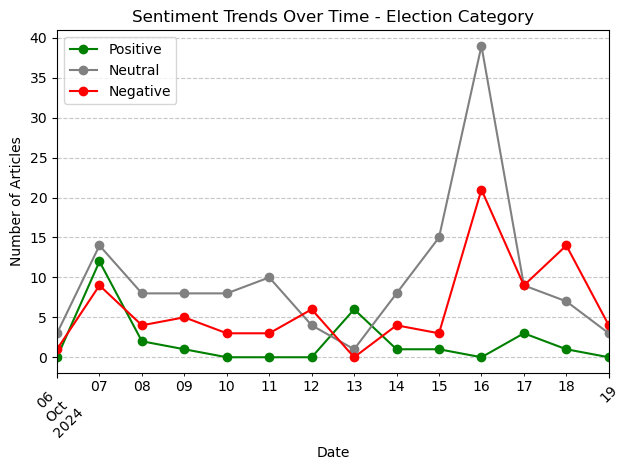

Sentiment counts for Finance category:
sentiment_score
Neutral     146
Positive     75
Negative     29
Name: count, dtype: int64




<Figure size 1200x600 with 0 Axes>

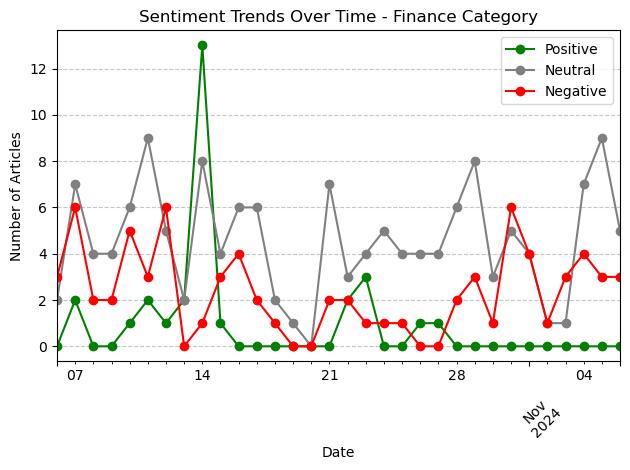


Sentiment distribution across categories:
sentiment_score  Negative  Neutral  Positive
category                                    
Business               56      100        94
Election               27      137        86
Environment            39      123        88
Finance                29      146        75
Health                 73      116        61




C:\Users\rohit\AppData\Local\Temp\ipykernel_17776\2580339975.py:71: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_sentiment_counts = category_data.groupby(['category', 'sentiment_score']).size().unstack()


<Figure size 1200x600 with 0 Axes>

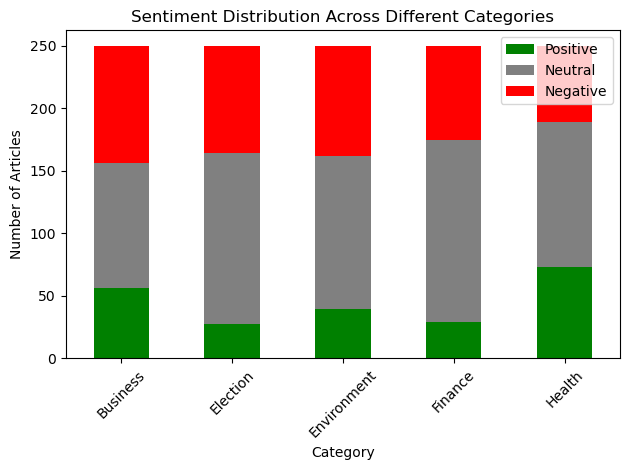


Sentiment distribution across all articles:
sentiment_score
Neutral     622
Positive    404
Negative    224
Name: count, dtype: int64




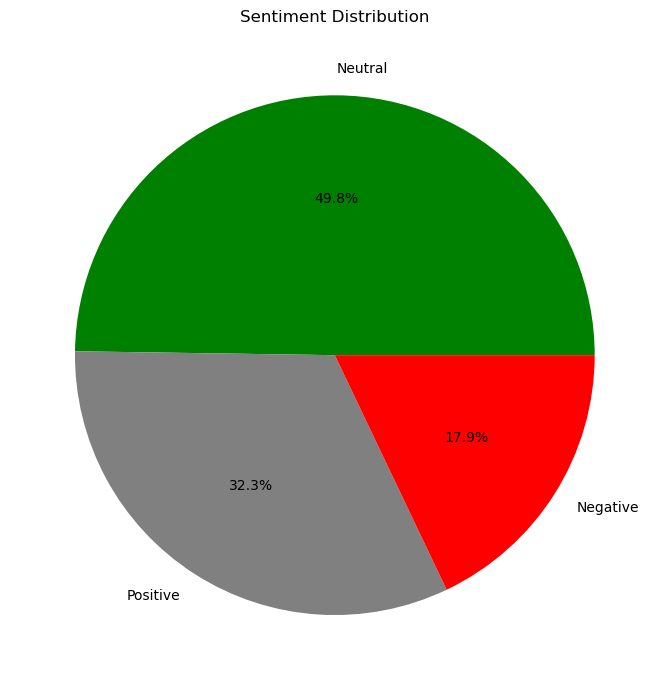


Sentiment comparison by top sources:
sentiment_score     Negative  Neutral  Positive
sourcename                                     
abcnews.go.com             3        6         4
article.wn.com             3        8         9
bravenewcoin.com           1       10        12
finance.yahoo.com          2       21         9
forbes.com                 4       26        16
globenewswire.com          1       16         3
medicalxpress.com          6        5         4
prnewswire.com             8       34        23
smallbiztrends.com         5       17         5
yahoo.com                 28       86        49




C:\Users\rohit\AppData\Local\Temp\ipykernel_17776\2580339975.py:105: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_source_sentiment_counts = category_data[category_data['sourcename'].isin(top_sources)].groupby(['sourcename', 'sentiment_score']).size().unstack()


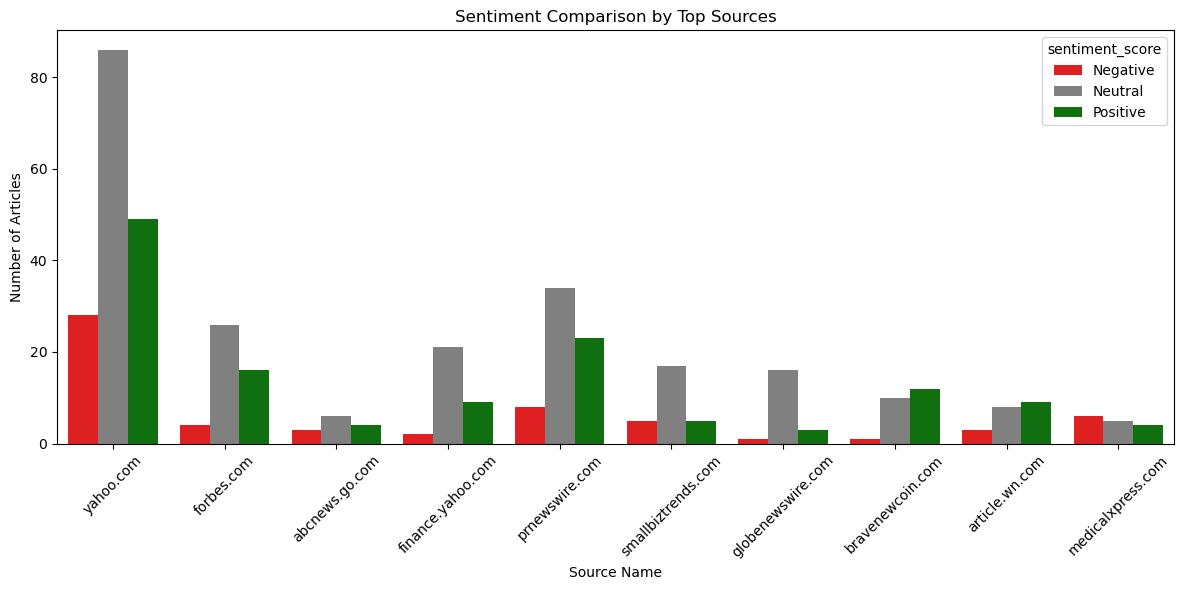

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

# Load dataset
file_path = r'D:\Projects\Project Seminar\dataCollection\data\News_Articles.csv'
category_data = pd.read_csv(file_path)

# Convert 'seendate' to datetime
category_data['seendate'] = pd.to_datetime(category_data['seendate'], errors='coerce')

# --- 1. Sentiment Analysis ---
# Function to calculate sentiment polarity (Positive: 1, Neutral: 0, Negative: -1)
def get_sentiment(text):
    analysis = TextBlob(str(text))
    # Polarity is between -1 (negative) and 1 (positive)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return 1  # Positive sentiment
    elif polarity == 0:
        return 0  # Neutral sentiment
    else:
        return -1  # Negative sentiment

# Apply sentiment analysis to 'title' column
category_data['sentiment'] = category_data['title'].apply(get_sentiment)

# Convert 'sentiment' to categorical type for better handling in plots
category_data['sentiment'] = category_data['sentiment'].astype('category')

# --- 2. Sentiment Score in a New Column ---
# Score column for sentiment: 1 (Positive), 0 (Neutral), -1 (Negative)
category_data['sentiment_score'] = category_data['sentiment'].map({1: 'Positive', 0: 'Neutral', -1: 'Negative'})

# --- 3. Sentiment Trend over Time ---
categories = ['Business', 'Election', 'Finance']  # Categories you want to plot

for category in categories:
    print(f"Sentiment counts for {category} category:")

    # Filter data by category
    category_filtered_data = category_data[category_data['category'] == category]

    # Calculate sentiment counts for positive, neutral, and negative
    sentiment_counts = category_filtered_data['sentiment_score'].value_counts()

    # Print sentiment counts
    print(sentiment_counts)
    print("\n")

    # Resample by day and get sentiment value counts
    sentiment_trend = category_filtered_data.resample('D', on='seendate').sentiment.value_counts().unstack().fillna(0)

    # Plot the sentiment trends for the category
    plt.figure(figsize=(12, 6))
    sentiment_trend.plot(kind='line', marker='o', color=['green', 'gray', 'red'])

    # Set plot titles and labels
    plt.title(f"Sentiment Trends Over Time - {category} Category")
    plt.xlabel("Date")
    plt.ylabel("Number of Articles")
    plt.xticks(rotation=45)
    plt.legend(['Positive', 'Neutral', 'Negative'])
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# --- 4. Bar Graph Comparing Sentiment Across Different Categories ---
print("\nSentiment distribution across categories:")
category_sentiment_counts = category_data.groupby(['category', 'sentiment_score']).size().unstack()
print(category_sentiment_counts)
print("\n")

# Plot the sentiment distribution across categories
plt.figure(figsize=(12, 6))
category_sentiment_counts.plot(kind='bar', stacked=True, color=['green', 'gray', 'red'])
plt.title("Sentiment Distribution Across Different Categories")
plt.xlabel("Category")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.legend(['Positive', 'Neutral', 'Negative'])
plt.tight_layout()
plt.show()

# --- 5. Pie Chart for Sentiment Distribution ---
print("\nSentiment distribution across all articles:")
sentiment_dist = category_data['sentiment_score'].value_counts()
print(sentiment_dist)
print("\n")

# Plot the sentiment distribution
plt.figure(figsize=(7, 7))
sentiment_dist.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'gray', 'red'])
plt.title("Sentiment Distribution")
plt.ylabel('')
plt.tight_layout()
plt.show()

# --- 8. Sentiment Comparison by Top Sources ---
print("\nSentiment comparison by top sources:")
top_sources = category_data['sourcename'].value_counts().head(10).index  # Top 10 sources

# Calculate sentiment counts for top sources
top_source_sentiment_counts = category_data[category_data['sourcename'].isin(top_sources)].groupby(['sourcename', 'sentiment_score']).size().unstack()
print(top_source_sentiment_counts)
print("\n")

# Plot sentiment comparison by top sources
plt.figure(figsize=(12, 6))
sns.countplot(data=category_data[category_data['sourcename'].isin(top_sources)], 
              x='sourcename', hue='sentiment_score', palette=['red', 'gray', 'green'])
plt.title("Sentiment Comparison by Top Sources")
plt.xlabel("Source Name")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Sentiment counts for Business category:
sentiment
 0    100
 1     94
-1     56
Name: count, dtype: int64




<Figure size 1200x600 with 0 Axes>

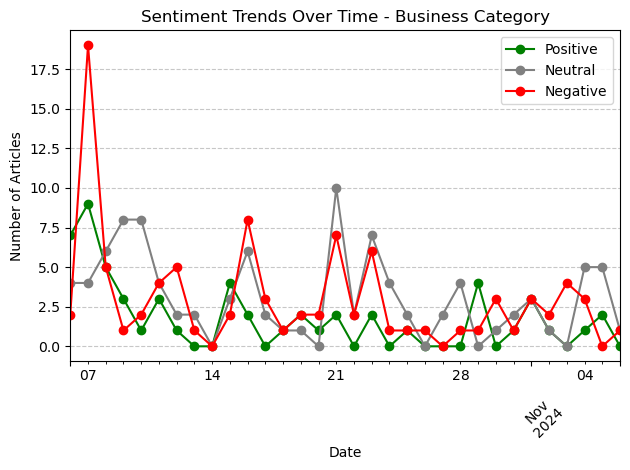

Sentiment counts for Election category:
sentiment
 0    137
 1     86
-1     27
Name: count, dtype: int64




<Figure size 1200x600 with 0 Axes>

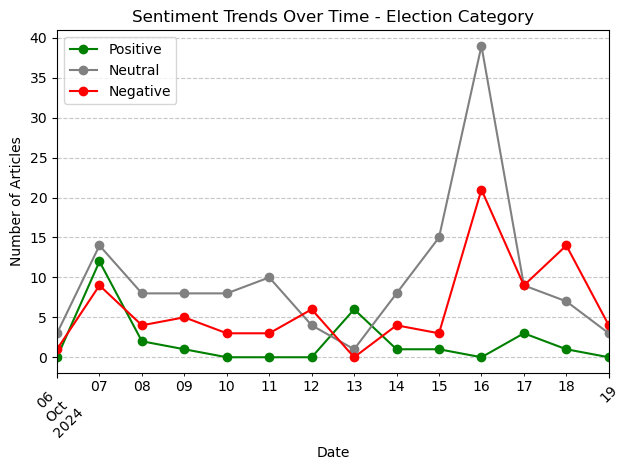

Sentiment counts for Finance category:
sentiment
 0    146
 1     75
-1     29
Name: count, dtype: int64




<Figure size 1200x600 with 0 Axes>

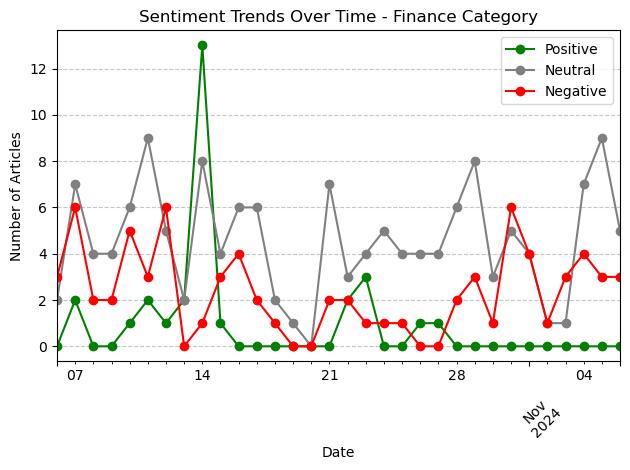

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'category_data' is already loaded and cleaned

# --- 3. Plotting: Sentiment Trend over Time for Specific Categories ---
categories = ['Business', 'Election', 'Finance']  # Categories you want to plot

for category in categories:
    print(f"Sentiment counts for {category} category:")

    # Filter data by category
    category_filtered_data = category_data[category_data['category'] == category]

    # Calculate sentiment counts for positive, neutral, and negative
    sentiment_counts = category_filtered_data['sentiment'].value_counts()

    # Print sentiment counts
    print(sentiment_counts)
    print("\n")

    # Resample by day and get sentiment value counts
    sentiment_trend = category_filtered_data.resample('D', on='seendate').sentiment.value_counts().unstack().fillna(0)

    # Plot the sentiment trends for the category
    plt.figure(figsize=(12, 6))
    sentiment_trend.plot(kind='line', marker='o', color=['green', 'gray', 'red'])

    # Set plot titles and labels
    plt.title(f"Sentiment Trends Over Time - {category} Category")
    plt.xlabel("Date")
    plt.ylabel("Number of Articles")
    plt.xticks(rotation=45)
    plt.legend(['Positive', 'Neutral', 'Negative'])
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


